# Workflow for color matching
Makes use of [this repo](https://github.com/hahnec/color-matcher). Reference perspective defined in cell below (currently Seimon 4K). 
To be converted into script later?

In [2]:
# Import color matching tools
from color_matcher import ColorMatcher
from color_matcher.io_handler import load_img_file, save_img_file, FILE_EXTS
from color_matcher.normalizer import Normalizer
import os

# Set path to all images
src_path = '../data/tornado_frame_groups/field_all_no_cc/'

# Load reference image
img_ref = load_img_file('../data/tornado_frame_groups/field_all_no_cc/Seimon_4K_calibrated_2024_corrected.png')

# Create array of filenames in src_path
filenames = [os.path.join(src_path, f) for f in os.listdir(src_path) if f.lower().endswith(FILE_EXTS)]

# Iterate through all images and convert color according to refernce image
cm = ColorMatcher()
for i, fname in enumerate(filenames):
    img_src = load_img_file(fname)
    img_res = cm.transfer(src=img_src, ref=img_ref, method='mkl')
    img_res = Normalizer(img_res).uint8_norm()
    save_img_file(img_res, os.path.join(os.path.dirname(fname), str(i)+'_color_matched.png'))

Display all color matched images

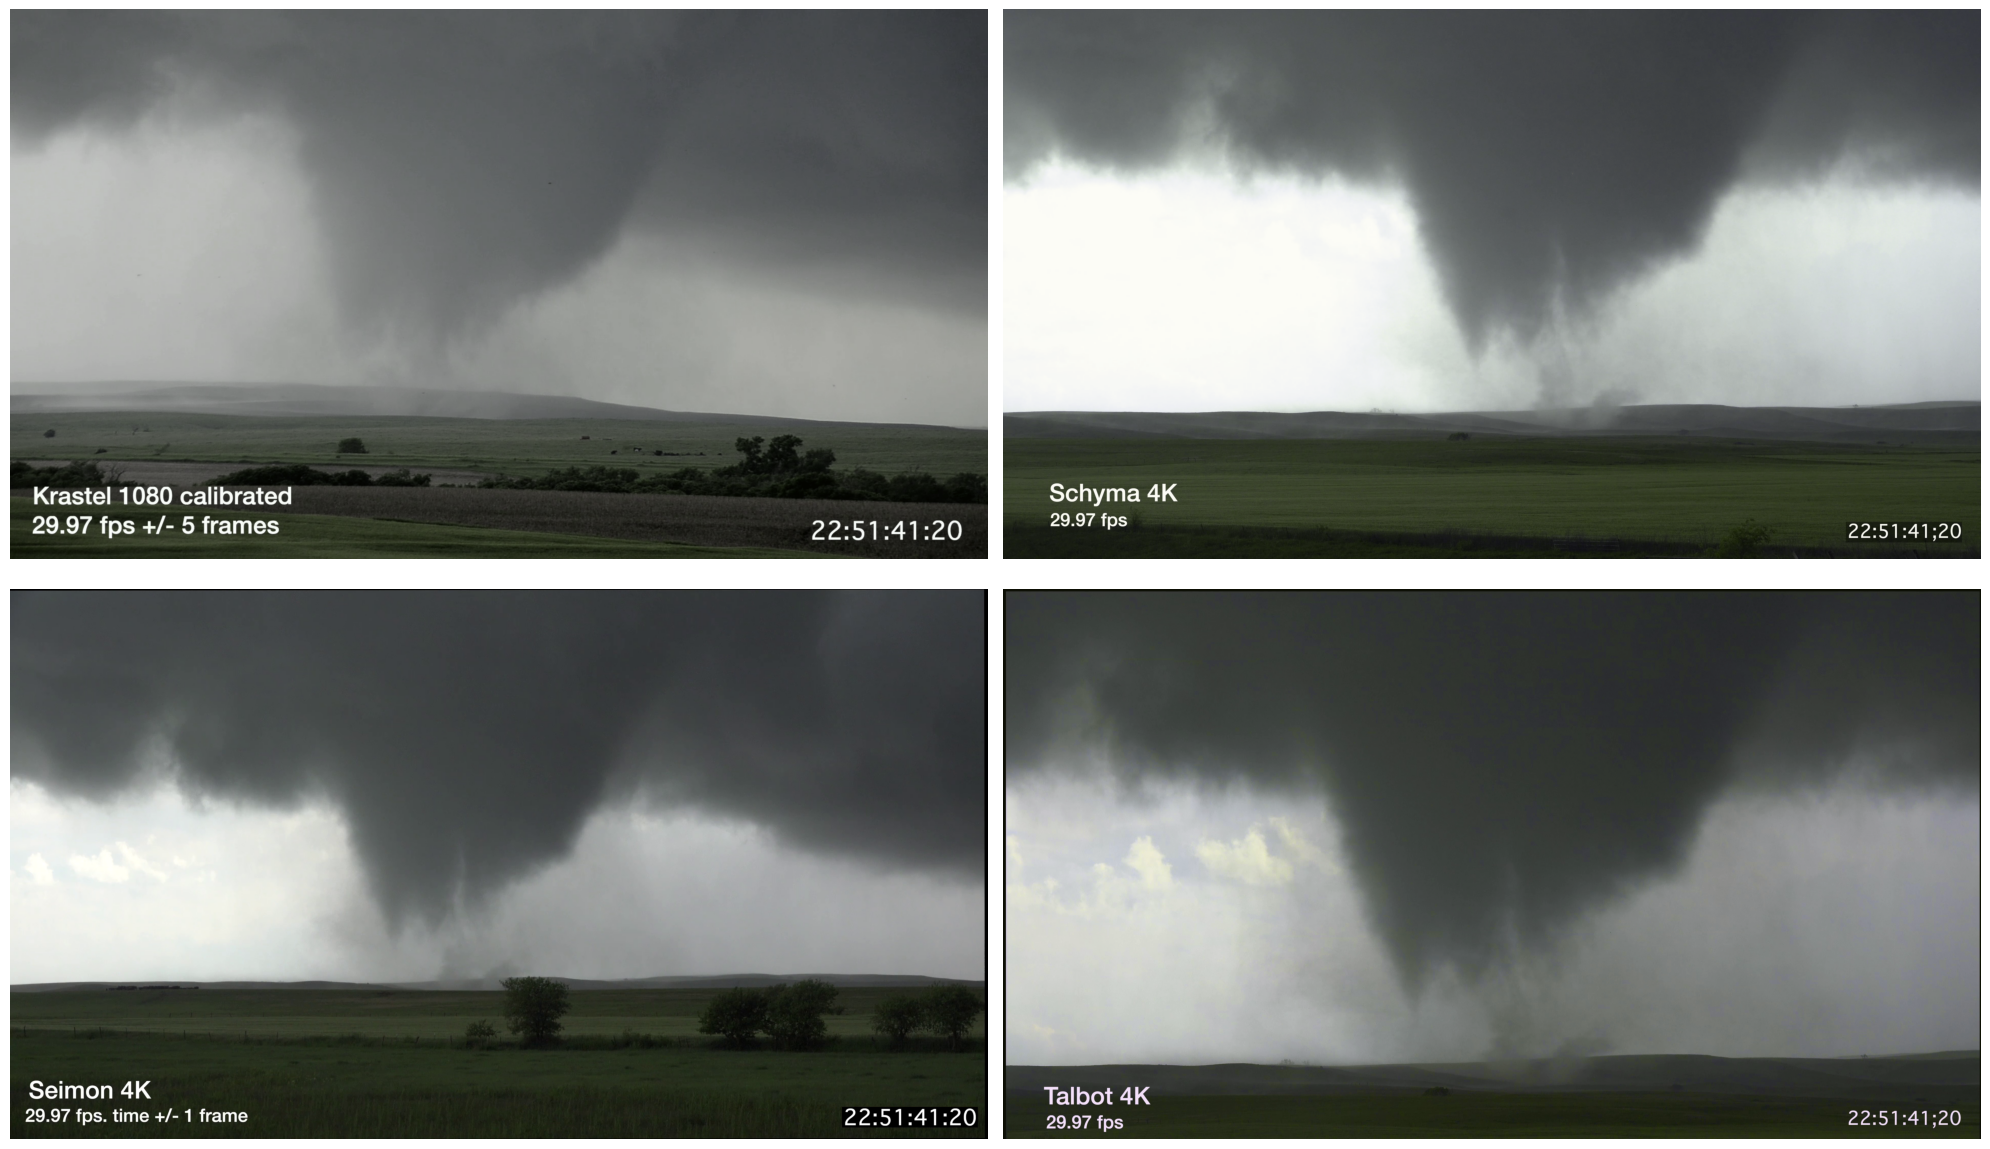

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
src = '../data/tornado_frame_groups/field_all_no_cc/matched'
directory = [os.path.join(src, f) for f in os.listdir(src) if f.lower().endswith(FILE_EXTS)]

images = [mpimg.imread(fname) for fname in directory]

# Create a 2x2 grid of images
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

for ax, img, title in zip(axes.flatten(), images, directory):
    ax.imshow(img)
    ax.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.tight_layout()
plt.show()

Show original images

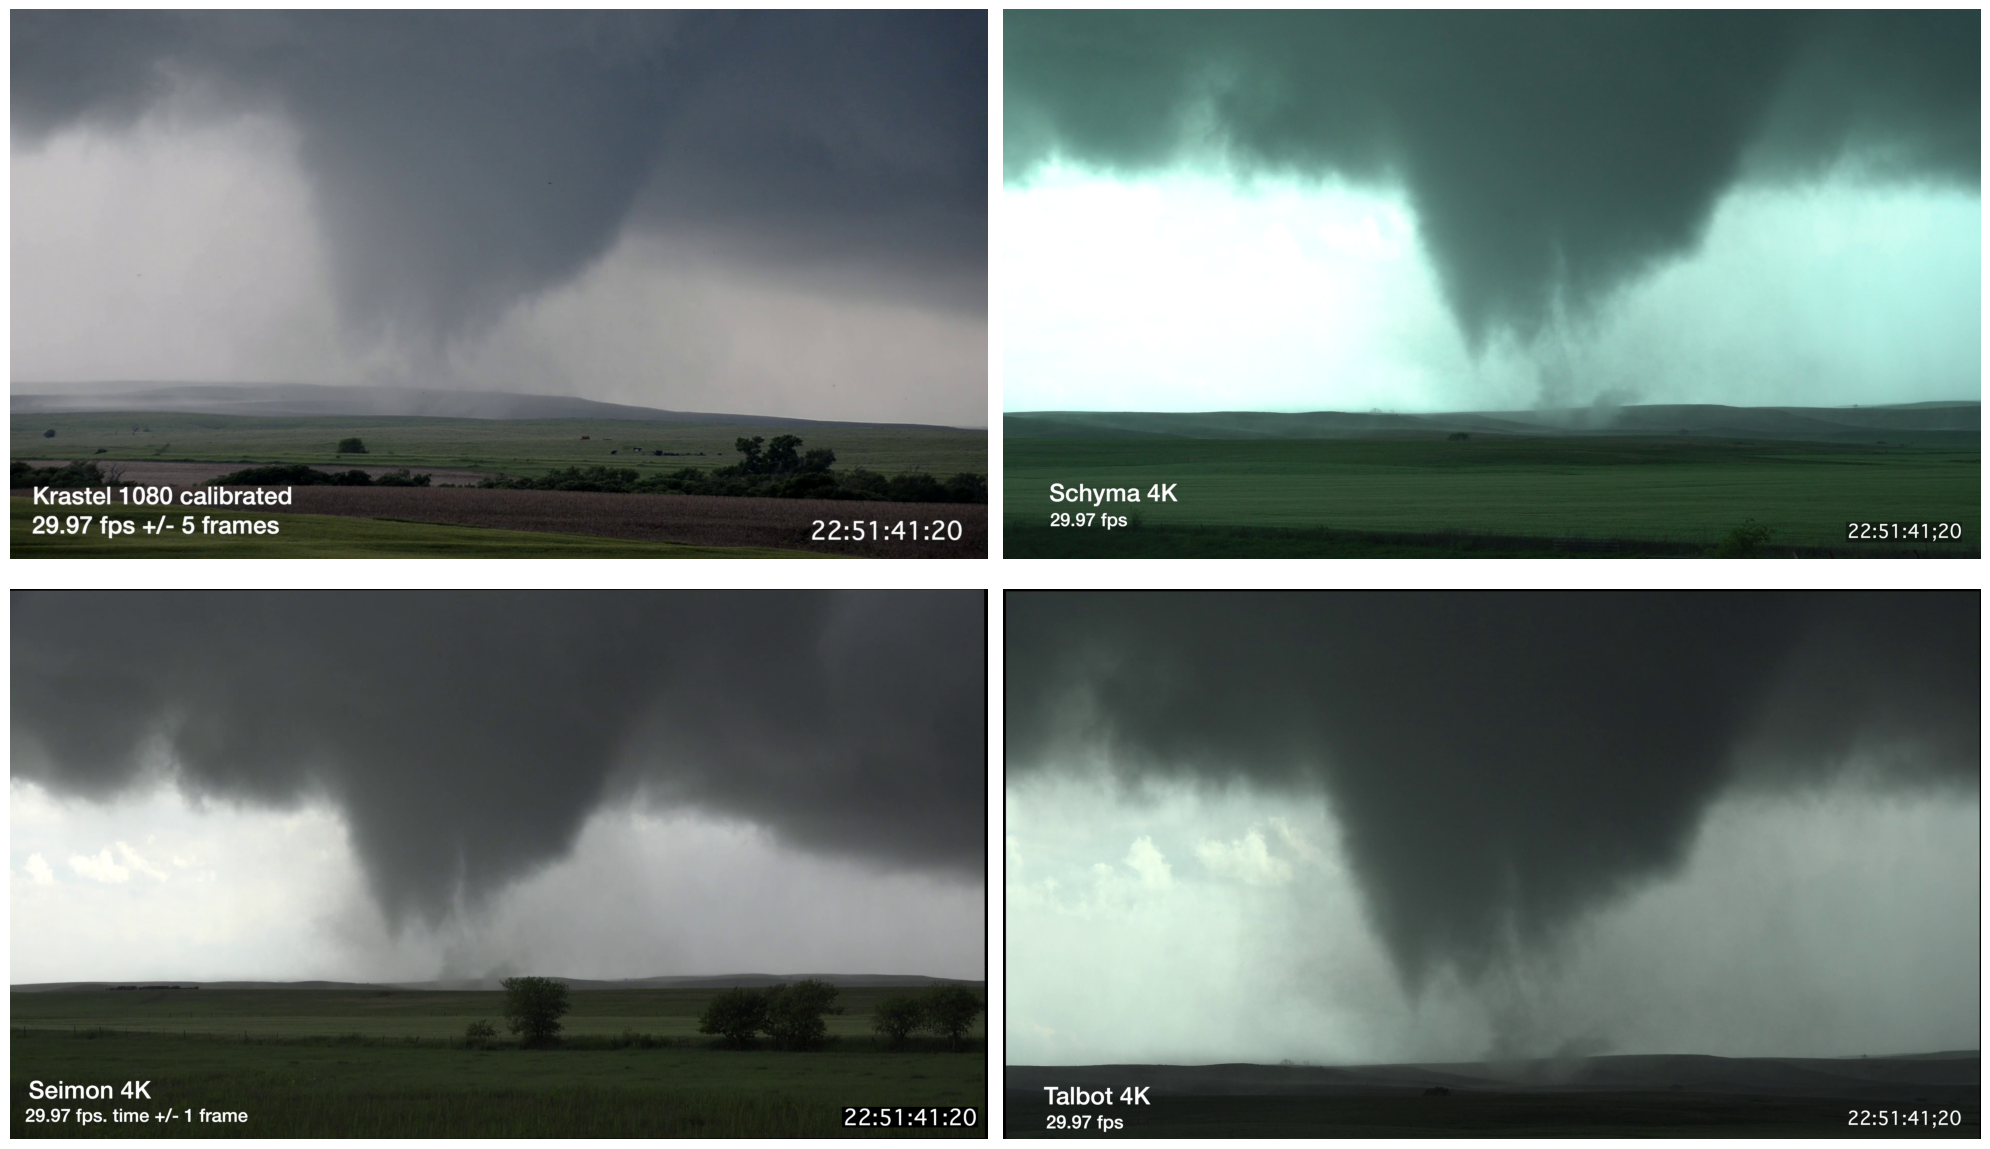

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
src = '../data/tornado_frame_groups/field_all_no_cc/temp'
directory = [os.path.join(src, f) for f in os.listdir(src) if f.lower().endswith(FILE_EXTS)]

images = [mpimg.imread(fname) for fname in directory]

# Create a 2x2 grid of images
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

for ax, img, title in zip(axes.flatten(), images, directory):
    ax.imshow(img)
    ax.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.tight_layout()
plt.show()